# libraries

In [ ]:
!pip install porespy;
import random
import numba
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as sc
import porespy as ps
from math import *
from numba import njit
from PIL import Image
from tqdm import tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Find the fractal dimension of Giant connected component in Ising model using the Box-counting method.

## labeled data

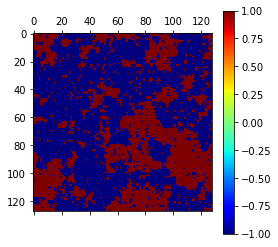

In [ ]:
lattice = lattice_periodic(128)
lf = MCMC_part(lattice, 128,10000,2.3)
plt.matshow(lf,cmap='jet')
plt.colorbar()

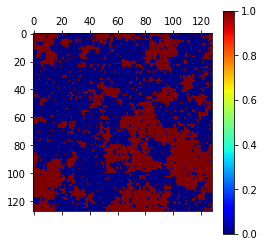

In [ ]:
lf[lf==-1]=0 # assign the spin -1 to 0 in ordert to use ndimage.label
lf[lf==1]=1
plt.matshow(lf,cmap='jet')
plt.colorbar()

In [ ]:
label_lf = sc.label(lf)[0]
label_lf

array([[  1,   1,   1, ...,   0,   7,   7],
       [  1,   1,   1, ...,   0,   7,   7],
       [  0,   1,   1, ...,   7,   7,   7],
       ...,
       [293, 293, 293, ...,   0,   0, 378],
       [293, 293, 293, ..., 378, 378, 378],
       [293, 293, 293, ...,   0, 378, 378]], dtype=int32)

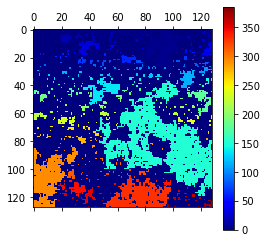

In [ ]:
plt.matshow(label_lf,cmap='jet')
plt.colorbar()

In [ ]:
np.bincount(label_lf.flatten())

array([10199,   282,     1,    60,    98,   430,     4,    21,     1,
           1,     1,     1,     1,     1,     5,     2,    15,     5,
          35,     8,     1,     1,     1,     2,     3,     1,     2,
           1,     1,     4,     3,     1,    71,     1,     1,     1,
           1,     1,    40,     2,     2,     7,     1,     1,     1,
           1,     1,     1,     1,     1,     3,     3,     1,     1,
           1,     1,     2,     1,     1,     1,     1,     2,    36,
           1,     1,     1,     2,     1,     6,    18,     1,     2,
           2,     1,     4,     1,     8,     3,     8,     1,     3,
           2,     8,     1,     6,     1,     1,     3,     2,     3,
           1,     1,     1,     1,     3,     1,     1,     1,     1,
           1,     1,     1,     1,     3,     1,     1,     1,    18,
           1,     1,     2,     1,     1,     1,     1,    89,     5,
           2,     1,     2,     3,     2,    10,     1,     1,     2,
           2,     1,

In [ ]:
np.where(np.bincount(label_lf.flatten()) == 2464)

(array([151]),)

In [ ]:
label_lf[label_lf != 151] = 0

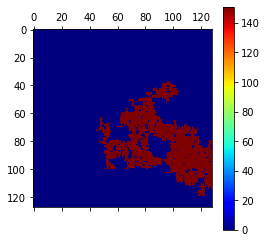

In [ ]:
giant = label_lf
plt.matshow(giant, cmap='jet')
plt.colorbar()

## box counting method

In [ ]:
data = ps.metrics.boxcount(giant)
print(data)

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Item                      Description
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
size                      Array of size (10,)
count                     [50, 36, 23, 15, 10, 7, 6, 4, 4, 2]
slope                     Array of size (10,)
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――


In [ ]:
measure = data.size
measure

array([ 10,  13,  17,  23,  31,  41,  54,  72,  96, 127])

In [ ]:
counted = np.flip(data.count)
counted

array([ 2,  4,  4,  6,  7, 10, 15, 23, 36, 50])

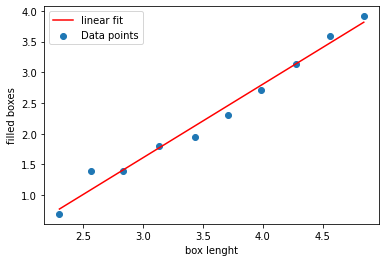

In [ ]:
model = np.poly1d(np.polyfit(np.log(measure), np.log(counted), 1))
plt.scatter(np.log(measure), np.log(counted), label = 'Data points')
plt.plot(np.log(measure), model(np.log(measure)), '-r', label = 'linear fit')
plt.xlabel('box lenght')
plt.ylabel('filled boxes')
plt.legend()

In [ ]:
fractal_dim = np.polyfit(np.log(measure), np.log(counted), 1)[0]
print('fractal dimension is {:.3f}'.format(fractal_dim))

fractal dimension is 1.197


# find the fractal dimension of 1D and 2D random walks using the Box-counting method.

## 1-D random walk

### function

In [ ]:
def rw_1d(n):
  y = 0
  time = np.arange(n + 1)
  position = [y]
  directions = ["u", "d"]
  for i in range(1, n + 1):
    step = random.choice(directions)
    if step == "u":
      y += 1
    elif step == "d":
      y -= 1
    position.append(y)
  return time, position

Text(0, 0.5, 'position')

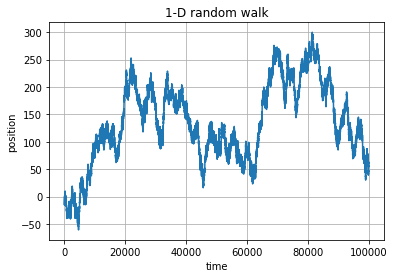

In [ ]:
time, x = rw_1d(100000)
plt.plot(time, x)
plt.title('1-D random walk')
plt.grid()
plt.xlabel('time')
plt.ylabel('position')

### making a binary data

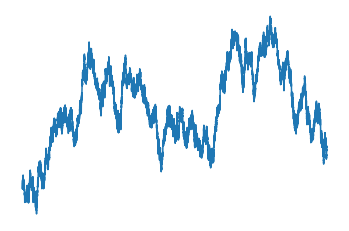

In [ ]:
plt.plot(time, x)
plt.axis('off')
plt.savefig('1d_rw.png', bbox_inches = 'tight')

In [ ]:
rw1 = Image.open('1d_rw.png')
rw1_arr = np.array(rw1)[:,:,1]
np.unique(rw1_arr)

array([119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 137, 138, 139, 140, 141, 142, 143, 144, 145,
       146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158,
       159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171,
       172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184,
       185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197,
       198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210,
       211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223,
       224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236,
       237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249,
       250, 251, 252, 253, 254, 255], dtype=uint8)

In [ ]:
rw1_arr[rw1_arr != 255] = 1
rw1_arr[rw1_arr == 255] = 0

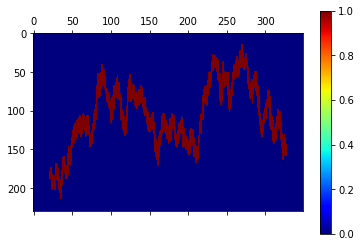

In [ ]:
plt.matshow(rw1_arr,cmap='jet')
plt.colorbar()

### box counting for 1-D RW

In [ ]:
rw1_bc = ps.metrics.boxcount(rw1_arr)
print(rw1_bc)

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Item                      Description
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
size                      Array of size (10,)
count                     [202, 121, 73, 46, 29, 18, 13, 6, 6, 2]
slope                     Array of size (10,)
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――


In [ ]:
measure1 = rw1_bc.size
measure1

array([ 10,  14,  20,  28,  40,  57,  81, 114, 162, 231])

In [ ]:
counted1 = np.flip(rw1_bc.count)
counted1

array([  2,   6,   6,  13,  18,  29,  46,  73, 121, 202])

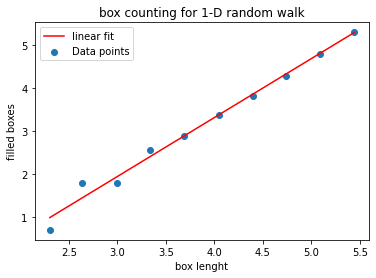

In [ ]:
model_rw1 = np.poly1d(np.polyfit(np.log(measure1), np.log(counted1), 1))
plt.scatter(np.log(measure1), np.log(counted1), label = 'Data points')
plt.plot(np.log(measure1), model_rw1(np.log(measure1)), '-r', label = 'linear fit')
plt.xlabel('box lenght')
plt.ylabel('filled boxes')
plt.title('box counting for 1-D random walk')
plt.legend()

In [ ]:
fractal_dim = np.polyfit(np.log(measure1), np.log(counted1), 1)[0]
print('fractal dimension is {:.3f}'.format(fractal_dim))

fractal dimension is 1.376


## 2-D random walk

### function

In [ ]:
def rw_2d(n):
  x = np.zeros(n)
  y = np.zeros(n)
  directions = ["u", "d", "l", "r"]
  for i in range(1, n):
    step = random.choice(directions)
    if step == "r":
      x[i] = x[i - 1] + 1
      y[i] = y[i - 1]
    elif step == "l":
      x[i] = x[i - 1] - 1
      y[i] = y[i - 1]
    elif step == "u":
      x[i] = x[i - 1]
      y[i] = y[i - 1] + 1
    elif step == "d":
      x[i] = x[i - 1]
      y[i] = y[i - 1] - 1

  return x, y

Text(0, 0.5, 'y')

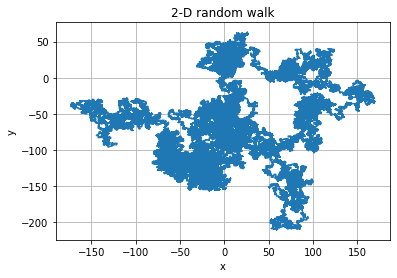

In [ ]:
x, y = rw_2d(100000)
plt.plot(x, y)
plt.title('2-D random walk')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')

In [ ]:
rw2 = Image.open('2d_rw.png')
rw2_arr = np.array(rw2)[:,:,2]
np.unique(rw2_arr)

array([180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192,
       193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205,
       206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218,
       219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231,
       232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244,
       245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255], dtype=uint8)

### making a binary data

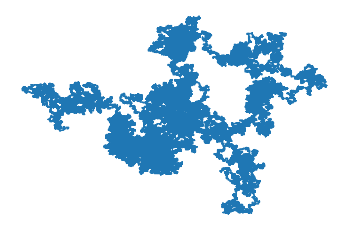

In [ ]:
plt.plot(x, y)
plt.axis('off')
plt.savefig('2d_rw.png', bbox_inches = 'tight')

In [ ]:
rw2_arr[rw2_arr != 255] = 1
rw2_arr[rw2_arr == 255] = 0

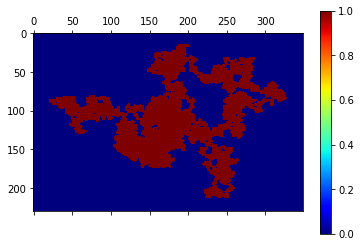

In [ ]:
plt.matshow(rw2_arr,cmap='jet')
plt.colorbar()

### box counting for 2-D RW

In [ ]:
rw2_bc = ps.metrics.boxcount(rw2_arr)
print(rw2_bc)

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Item                      Description
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
size                      Array of size (10,)
count                     [236, 149, 84, 55, 32, 18, 12, 6, 5, 2]
slope                     Array of size (10,)
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――


In [ ]:
measure2 = rw2_bc.size
measure2

array([ 10,  14,  20,  28,  40,  57,  81, 114, 162, 231])

In [ ]:
counted2 = np.flip(rw2_bc.count)
counted2

array([  2,   5,   6,  12,  18,  32,  55,  84, 149, 236])

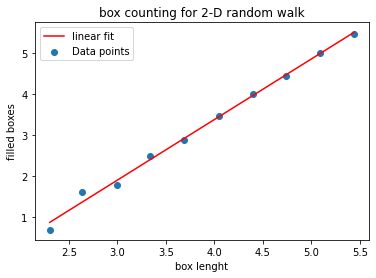

In [ ]:
model_rw2 = np.poly1d(np.polyfit(np.log(measure2), np.log(counted2), 1))
plt.scatter(np.log(measure2), np.log(counted2), label = 'Data points')
plt.plot(np.log(measure2), model_rw2(np.log(measure2)), '-r', label = 'linear fit')
plt.xlabel('box lenght')
plt.ylabel('filled boxes')
plt.title('box counting for 2-D random walk')
plt.legend()

In [ ]:
fractal_dim = np.polyfit(np.log(measure2), np.log(counted2), 1)[0]
print('fractal dimension is {:.3f}'.format(fractal_dim))

fractal dimension is 1.475
